In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import plotly.express as px

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
url= 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/kc_house_data.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


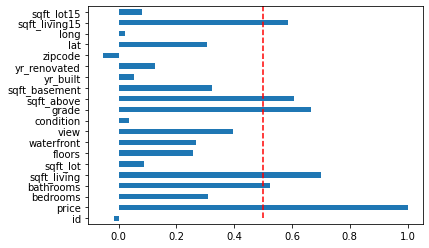

In [16]:
df.corrwith(df.price).plot(kind='barh')
plt.vlines(x=0.5, ymin=0, ymax=100, linestyles='dashed',colors='red')
plt.show()

In [18]:
selected_cols = ['bathrooms', 'sqft_living', 'grade','sqft_above', 'sqft_living15',]
df_selected = df[selected_cols]
df_selected

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
scaler = StandardScaler()
X_scaled =scaler.fit_transform(df_selected)
y = df.price
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ready for training

In [25]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dtest = xgb.DMatrix(Xtest, label=ytest)

In [26]:
params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 0.1,
}

In [34]:
results = xgb.cv(params,
                 dtrain,
                 num_boost_round=50, 
                 nfold=5,
                 early_stopping_rounds=5,
                 metrics=['rmse','mae'],)

In [35]:
results.columns

Index(['train-rmse-mean', 'train-rmse-std', 'train-mae-mean', 'train-mae-std',
       'test-rmse-mean', 'test-rmse-std', 'test-mae-mean', 'test-mae-std'],
      dtype='object')

In [36]:
px.line(results, x=results.index, y=['train-rmse-mean','test-rmse-mean'], title='RMSE of Training and Test Data')

In [37]:
px.line(results, x=results.index, y=['train-mae-mean','test-mae-mean'], title='MAE of Training and Test Data')